In [162]:
#plot en jupyter
%matplotlib inline 
#Paquetes a usar 
import numpy as np 
import pandas as pd 
import pylab as pl 
import datetime as dt 
import os 
from wmf import wmf 
# import func_SIATA as fS
from multiprocessing import Pool
#Ignorar avisos pendejos
import warnings
warnings.filterwarnings('ignore')

In [2]:
import scipy as sc
from scipy import signal

In [ ]:
import pandas as pd 
import datetime as dt 
import numpy as np 

In [213]:
fechaI='2017-01-01-00:00:00'
fechaF='2017-12-31-23:55:00'
freq_='5Min'

In [222]:
def radiacion_teorica_escalada(Hora,fechaI,freq_):
    rng=pd.date_range(fechaI, fechaF, freq=freq_)
    rad=np.zeros(rng.size)
    for pos,time in enumerate(rng):
        Hora=time
        # Dia del Año
        dn = Hora.timetuple().tm_yday
        Theta_d = (2 * np.pi * (dn-1))/ 365.
        # (d/d)2
        an = [1.000110, 0.034221, 0.000719]
        bn = [0,        0.001280, 0.000077]
        #
        d   = 0
        tmp = 0
        for i in range(3):
            tmp = (an[i] * np.cos(i*Theta_d)) + (bn[i] * np.sin(i*Theta_d))
            d = d + tmp
        # Delta
        a_n = [0.006918, -0.399912, -0.006758, -0.002697]
        b_n = [0,         0.070257,  0.000907,  0.001480]
        #
        Delta = 0
        tmp   = 0
        for i in range(4):
            tmp = (a_n[i] * np.cos(i*Theta_d)) + (b_n[i] * np.sin(i*Theta_d))
            Delta = Delta + tmp
        #Angulo horario (cada minuto)
        Minutos = (Hora.hour * 60) + Hora.minute
        Horario = 180 - (0.25 * Minutos)
        Horario = (Horario * np.pi)/180.
        # Coseno de Theta
        Latitud = (6.2593 * np.pi)/180.
        Cos_Theta = (np.sin(Latitud)*np.sin(Delta)) + (np.cos(Latitud)*np.cos(Delta)*np.cos(Horario))
        # Radiacion Teorica
        So = 1367 #w/m2
        Q = So * d * Cos_Theta
        # Escala entre 0 y 1
        rad_max=1369.8721876806876
        Q=1*Q/rad_max
        #Guarda
        rad[pos]=Q
    #Se vuelven cero los valores negativos.
    rad[rad<0]=0
    #Serie
    rad=pd.Series(rad,index=rng)
    return rad

In [226]:
fechaI='2016-01-01-00:00:00'
fechaF='2016-12-31-23:55:00'
freq_='5Min'
lol=radiacion_teorica_escalada(Hora,fechaI,freq_)

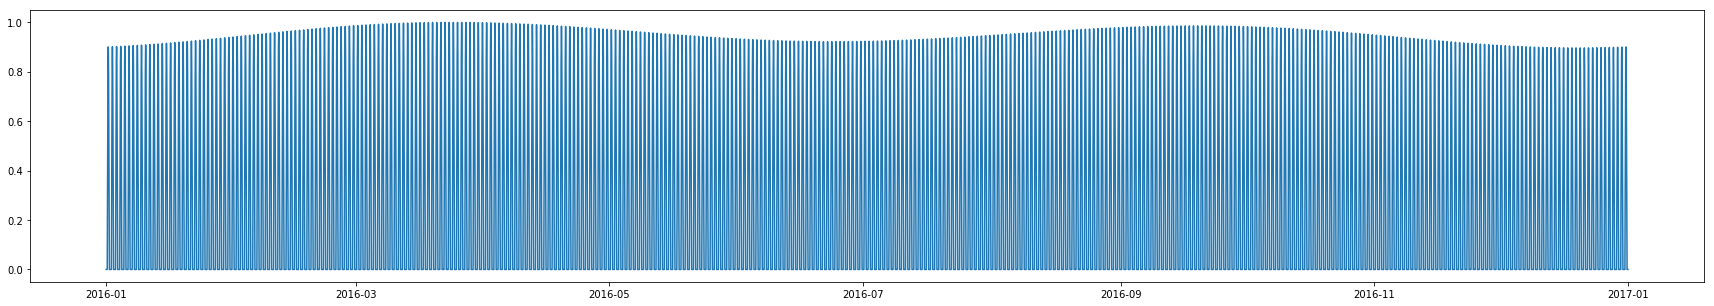

In [227]:
pl.figure(figsize=(30,5))
pl.plot(lol)

In [238]:
fechaI='2016-01-01-12:00:00'
fechaF='2016-01-01-18:00:00'
freq_='5Min'
lol=radiacion_teorica_escalada(Hora,fechaI,freq_)

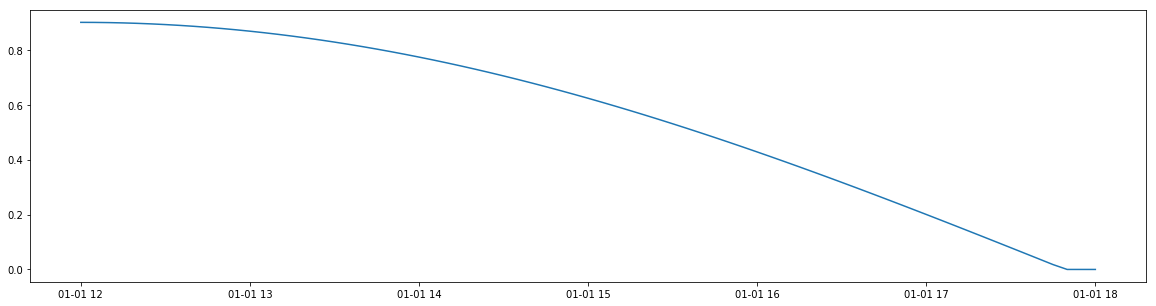

In [239]:
pl.figure(figsize=(20,5))
pl.plot(lol)

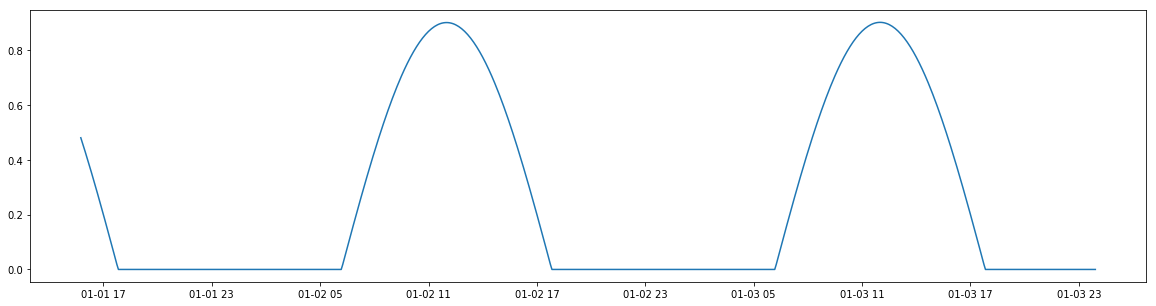

In [237]:
pl.figure(figsize=(20,5))
pl.plot(lol)

In [29]:
steps=24*12 # 10 horas de sol en pasoss de 5 min
std=1.5*12 # 1.8 horas

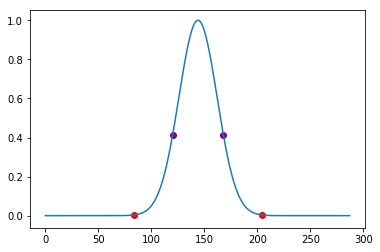

In [38]:
array=signal.gaussian(steps,std,sym=False)

pl.plot(array)
# serie
pl.scatter(7*12,array[7*12],c='r')
pl.scatter(array.size-7*12,array[-7*12],c='r')
pl.scatter(10*12,array[10*12],c='purple')
pl.scatter(14*12,array[14*12],c='purple')

Funcion

In [153]:

def serie_a_escala(dt,diaI,diaF):
    # se construyes el array para un solo dia
    #dt no puede ser mayor a 60.
    horasdia=24
    stepsh=60/dt
    stepsd=horasdia*stepsh+1
    std=1.85*stepsh 
    array=signal.gaussian(stepsd,std,sym=False)
    a=np.around(array,2)

#     pl.plot(a)
#     r=6
#     pl.scatter(r*stepsh,array[r*stepsh],c='r')
#     pl.scatter(array.size-r*stepsh,array[-r*stepsh],c='r')
    #     pl.scatter(10*stepsh,array[10*stepsh],c='purple')
    #     pl.scatter(14*stepsh,array[14*stepsh+1],c='purple')
    #     pl.scatter(int(15.27*stepsh),array[int(15.27*stepsh)],c='b')
    #     print a[r*stepsh]
    #     print a[-r*stepsh]
    #     print a[10*stepsh]
    #     print a[14*stepsh]

    # serie
    rng=pd.date_range(diaI+'-00:00',diaF+'-00:00',freq=str(dt)+'min')
    serie=pd.Series(np.zeros(rng.size),index=rng)
    numerodedias=rng.size/(stepsh*horasdia)

    for d in range(numerodedias):
        serie[d*horasdia*stepsh:(d+1)*horasdia*stepsh+1]=a
    return serie

In [156]:
dt=60 # numero de minutos no mayor a 60.
diaI='2017-10-01' #inicio
diaF='2017-12-02' #fin
lol=serie_a_escala(dt,diaI,diaF)
lol

2017-10-01 00:00:00    0.00
2017-10-01 01:00:00    0.00
2017-10-01 02:00:00    0.00
2017-10-01 03:00:00    0.00
2017-10-01 04:00:00    0.00
2017-10-01 05:00:00    0.00
2017-10-01 06:00:00    0.00
2017-10-01 07:00:00    0.01
2017-10-01 08:00:00    0.05
2017-10-01 09:00:00    0.17
2017-10-01 10:00:00    0.40
2017-10-01 11:00:00    0.72
2017-10-01 12:00:00    0.96
2017-10-01 13:00:00    0.96
2017-10-01 14:00:00    0.72
2017-10-01 15:00:00    0.40
2017-10-01 16:00:00    0.17
2017-10-01 17:00:00    0.05
2017-10-01 18:00:00    0.01
2017-10-01 19:00:00    0.00
2017-10-01 20:00:00    0.00
2017-10-01 21:00:00    0.00
2017-10-01 22:00:00    0.00
2017-10-01 23:00:00    0.00
2017-10-02 00:00:00    0.00
2017-10-02 01:00:00    0.00
2017-10-02 02:00:00    0.00
2017-10-02 03:00:00    0.00
2017-10-02 04:00:00    0.00
2017-10-02 05:00:00    0.00
                       ... 
2017-11-30 19:00:00    0.00
2017-11-30 20:00:00    0.00
2017-11-30 21:00:00    0.00
2017-11-30 22:00:00    0.00
2017-11-30 23:00:00 

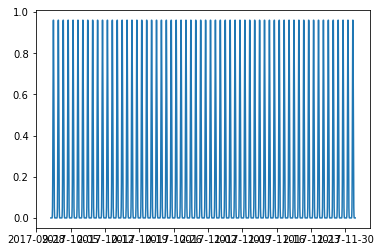

In [157]:
pl.plot(lol)

#### Se carga a informacion de registrada en la cuenca

In [7]:
#Rutas
ruta_rain = '/media/nicolas/Home/nicolas/01_SIATA/bin_rain/Picacha/'
ruta_qobs = '/media/nicolas/Home/Jupyter/Soraya/series/Qobs116_1min_2014-07-10_2017-10-23.msg'
ruta_cuenca = '/media/nicolas/Home/nicolas/01_SIATA/nc_cuencas/Picacha_Abajo.nc'

In [8]:
year = {'2013':'Campos_Picacha_2013_300s',
        '2014':'Campos_Picacha_2014_300s',
        '2015':'Campos_Picacha_2015_300s',
        '2016':'Campos_Picacha_2016_300s',
        '2017':'Campos_Picacha_2017-01-01_2017-10-25_300s'}#,
        #'2017':'Campo_LaInmaculada12m_2017_300s_u0.01'}

In [9]:
Rain={}
Rain.update({'2013':wmf.read_mean_rain(ruta_rain+year['2013']+'.hdr')})
Rain.update({'2014':wmf.read_mean_rain(ruta_rain+year['2014']+'.hdr')})
Rain.update({'2015':wmf.read_mean_rain(ruta_rain+year['2015']+'.hdr')})
Rain.update({'2016':wmf.read_mean_rain(ruta_rain+year['2016']+'.hdr')})
Rain.update({'2017':wmf.read_mean_rain(ruta_rain+year['2017']+'.hdr')})

A falta de curva de calibración se separan los eventos importantes desde la seire de nivel

In [10]:
N = pd.read_msgpack(ruta_qobs)
N=N.resample('5min').mean()/100 # en metros

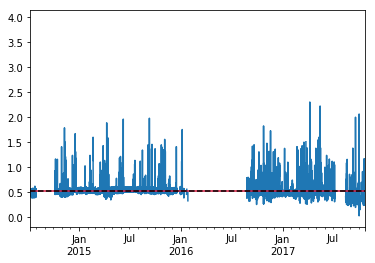

In [39]:
N.plot()
medianaN=np.percentile(N.dropna(),50)
media=N.mean()
pl.axhline(medianaN,c='crimson')
pl.axhline(media,c='k',ls='--')

In [12]:
P=Rain['2013'].append(Rain['2014'])
P=P.append(Rain['2015'])
P=P.append(Rain['2016'])
P=P.append(Rain['2017'])
P=P.reindex(pd.date_range(P.index[0],P.index[-1],freq='5min'))

In [13]:
print N.index[0]
print N.index[-1]

2014-07-10 00:00:00
2017-10-23 18:25:00


In [14]:
print P.index[0]
print P.index[-1]

2012-12-31 19:05:00
2017-10-25 18:55:00


Solo se analiza en el rango en que concuerden.

In [15]:
P=P[N.index[0]:P.index[-1]]

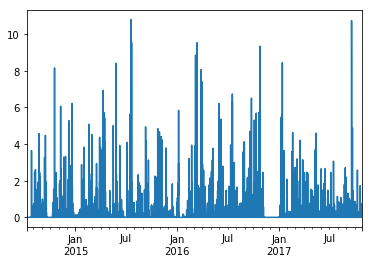

In [16]:
P.plot()

#### Se separan los eventos

Función

In [17]:
def FindMax(Q,fechas,umbral,horasAtras=12,BusquedaAdelante=36):
    '''Nota: Q debe ser un masked_array'''
    pos=np.where(Q>umbral)[0]
    grupos=[];g=[];Qmax=[]
    #Encuentra el maximo de cada grupo
    for pant,pnext in zip(pos[:-1],pos[1:]):        
        if pant+1>=pnext and pant+BusquedaAdelante>=pnext:
            g.append(pant)
        else:
            if len(g)>0:
                PosMaxGrupo=np.argmax(Q[g])
                grupos.append(g[PosMaxGrupo])
                Qmax.append(np.max(Q[g]))
            g=[]
    #Pule el maximo por si hay noData
    for c,g in enumerate(grupos):
        if Q.mask[g-1]:
            grupos.pop(c)
    #Obtiene las fechas 12 horas atras 
    if type(fechas)==list:
        fechas=__np.array(fechas)
    FechasAtras=fechas[grupos]-dt.timedelta(hours=horasAtras)
    fechas=list(fechas)     
    posAtras=[fechas.index(i) for i in FechasAtras]
    return grupos,np.array(Qmax)

El limite para buscar eventos importantes se escoge mirando los eventos en la serie

In [18]:
#Busqueda de maximos 
Nma = np.ma.array(N.values, mask=N.values > 3)
G, Nmax = FindMax(Nma, N.index.to_pydatetime(), 1, BusquedaAdelante=100)
#Maximos establecidos como series de pandas
Gs = pd.Series(Nma[G], index=N.index[G])
Gs.size

128

59

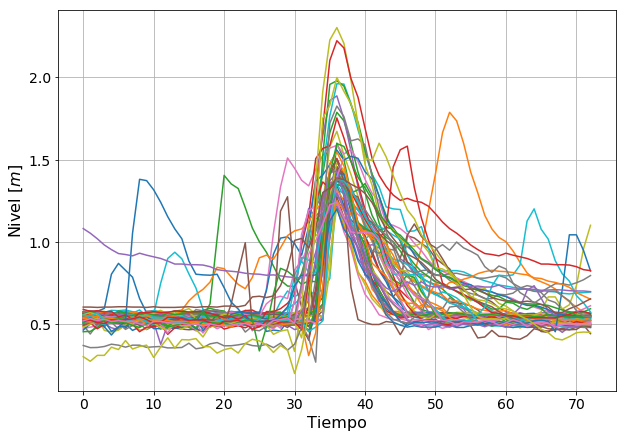

In [19]:
tm = pd.Timedelta('3 hours')
c = 0
fig = pl.figure(figsize=(10,7))
ax = fig.add_subplot(111)
Matriz = []
Pos = []
GsCut = []
for p,i in enumerate(Gs.index):
    #se guarda y plotea informacion solo para eventos importantes y con buena lluvia.
    if N[i] >= 1.2 and P[i-tm:i+tm].max() > 0: # - tm: i + tm].values.argmax()
        ax.plot(N[i - tm: i + tm].values)
        Matriz.append(N[i - tm: i + tm].values)
        c+=1
        Pos.append(p)
pl.grid()
pl.xlabel('Tiempo', size = 16)
pl.ylabel('Nivel $[m]$', size = 16)
ax.tick_params(labelsize = 14)
GsCut = Gs[Pos]
GsCut.size

In [20]:
eventos=np.random.randint(0,GsCut.size, 10)

#### Se prepara para simulación

--------------------> Nota: Hay que preparar la cuenca con las cosas de Slides!!!!! <--------------------------

In [21]:
cu = wmf.SimuBasin(rute=ruta_cuenca)
wmf.models.separate_fluxes = 1
wmf.models.show_storage = 1
wmf.models.dt = 300
wmf.models.retorno = 1

In [22]:
nodo=0

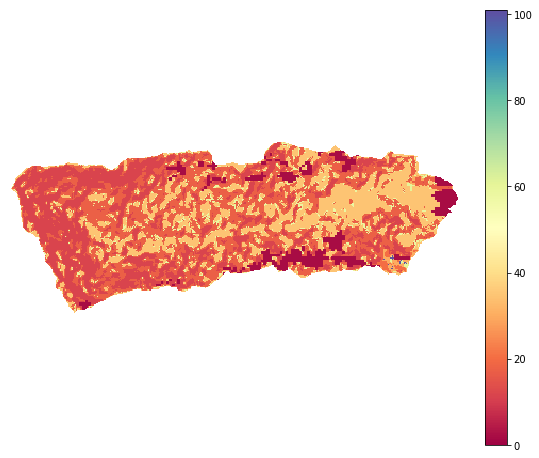

([-75.66084289550781,
  -75.613383493677247,
  6.223681449890137,
  6.2418729542769142],
 <matplotlib.axes._subplots.AxesSubplot at 0x7efb9dc58d50>)

In [23]:
cu.Plot_basinClean(wmf.models.max_capilar,show_cbar=True)

# Calibracion

In [547]:
index=GsCut.index[eventos[1]]
index

Timestamp('2017-02-23 22:50:00')

In [548]:
corr=0

In [549]:
Inicio = P.index.get_loc(index-tm)+corr
Npasos = 80
Fin=Inicio+Npasos

80

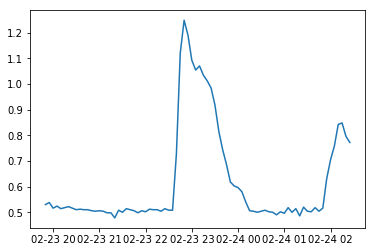

In [550]:
pl.plot(N[Inicio:Fin])
Npasos

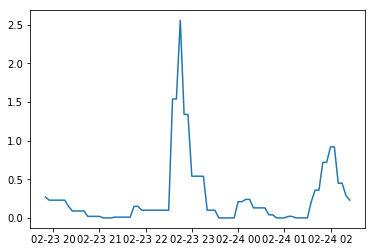

In [551]:
pl.plot(P[Inicio:Fin])

Set de condiciones iniciales:

cu.set_Storage(wmf.models.max_capilar*0.8, 0)
cu.set_Storage(0.1, 1)
cu.set_Storage(0.1, 2)
cu.set_Storage(10,3)
cu.set_Storage(0.1, 4)

cu.set_Storage(wmf.models.max_capilar*0.8, 0)
cu.set_Storage(0.1, 1)
cu.set_Storage(0.1, 2)
cu.set_Storage(0.1,3)
cu.set_Storage(0.1, 4)

cu.set_Storage(wmf.models.max_capilar*0.5, 0)
cu.set_Storage(0.1, 1)
cu.set_Storage(5, 2)
cu.set_Storage(0,3)
cu.set_Storage(0.1, 4)


cu.set_Storage(wmf.models.max_capilar*0.8, 0)
cu.set_Storage(0.1, 1)
cu.set_Storage(10, 2)
cu.set_Storage(50,3)
cu.set_Storage(0.1, 4)


In [552]:
cu.set_Storage(wmf.models.max_capilar*0.8, 0)
cu.set_Storage(0.1, 1)
cu.set_Storage(1, 2)
cu.set_Storage(50,3)
cu.set_Storage(0.1, 4)


Ejecución 1

In [568]:
corr=0
inicio=Rain[str(index.year)].index.get_loc(index-tm)+corr
Calib = [0.000034, 28, 15, 0, 8, 6, 1, 0.89999, 1.3, 1] # -- para picos.
Calib = [0.000034, 80, 15, 0, 1, 6, 1, 0.89999, 3, 1]
# Calib = [0.000034, 225, 40, 0, 0.008, 6, 1, 0.89999, 3, 1]
Res = cu.run_shia(Calib, ruta_rain+year[str(index.year)]+'.bin', Npasos, inicio)#,kinematicN=7)

In [569]:
ini=20;end=Npasos;corr=0
Qsim=Res[0]['Qsim'][nodo][ini:end]
Qrun = Res[0]['Fluxes'][nodo][0][ini:end]
Qsub = Res[0]['Fluxes'][nodo][1][ini:end]
Qbase = Qsim - Qrun - Qsub
Qsim2=Qsim-0.25+medianaN #se cambia la magnitud del valor.
Qsep = np.vstack([Qsim,Qsim2, Qrun+Qbase, Qsub+Qbase, Qbase])
Qobs=N[Inicio+corr:Fin+corr][ini:end]
S=P[Inicio:Fin][ini:end]
NS=wmf.__eval_nash__(Qobs,Qsim2)
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])

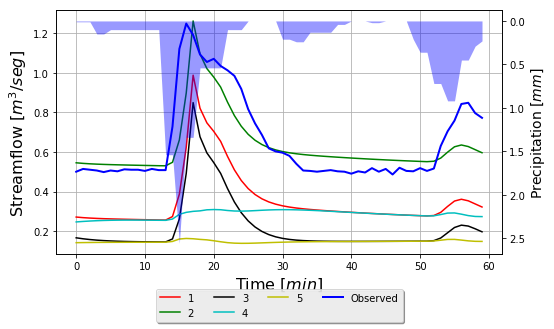

0.710182641924


In [570]:
wmf.plot_sim_single(Qsep, 
    mrain=S.values, 
    Qo=Qobs.values)#,
#     Dates = Rain[index-tm:index+tm].index.to_pydatetime())
print NS

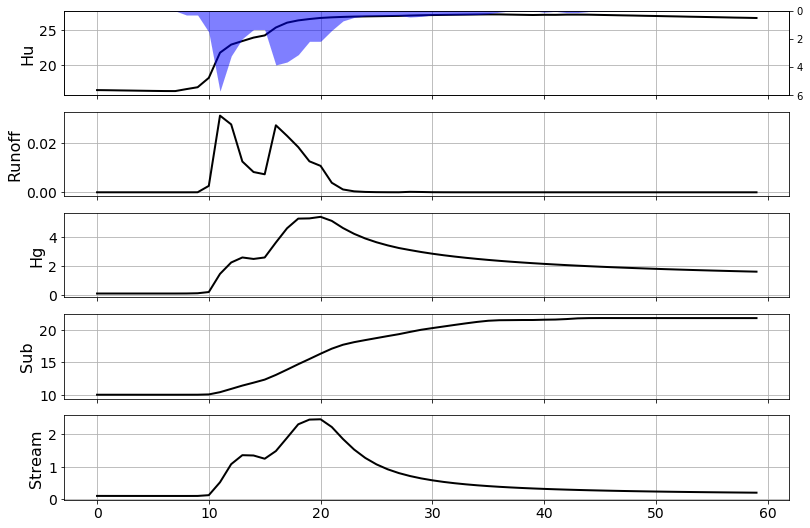

In [534]:
wmf.plot_mean_storage(Mean_Storage, mrain=S.values, lw = 2)

In [545]:
ini=Npasos-40;end=Npasos
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])
Mean_Storage[0].max()-Mean_Storage[0][-1]

0.51480865

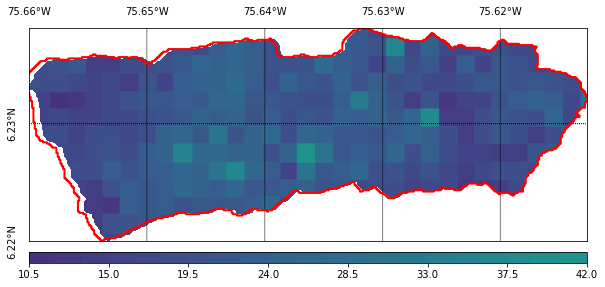

(<mpl_toolkits.basemap.Basemap at 0x7efb6db526d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efb6f987e50>)

In [571]:
cu.Plot_basin(Res[0]['Rain_Acum'],lines_spaces=0.01,vmin=0,vmax=80)

___

#### Evento 1

index=GsCut.index[0]

In [585]:
index='2016-09-14-10:00'

In [586]:
Inicio = P.index.get_loc(index)
Npasos = 100
Fin=Inicio+Npasos

100

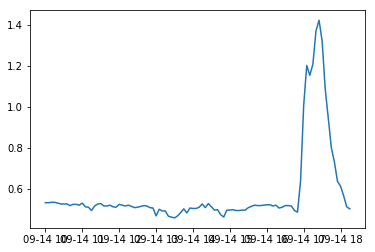

In [587]:
pl.plot(N[Inicio:Fin])
Npasos

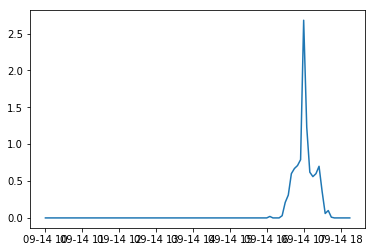

In [588]:
pl.plot(P[Inicio:Fin])

Set de condiciones iniciales:

In [23]:
cu.set_Storage(50,3)
cu.set_Storage(wmf.models.max_capilar*0.8, 0)
cu.set_Storage(1, 2)
cu.set_Storage(0.1, 4)
cu.set_Storage(0.1, 1)

Ejecución 1

In [228]:
Calib = [0.0015, 2.0, 4.0, 0, 1, 1, 1.0, 0.9, 1, 1]
# Res = cu.run_shia(Calib, ruta_rain+'.bin', Npasos, Inicio)#,kinematicN=7)

In [233]:
ini=20;end=Npasos;corr=30
Qsim=Res[0]['Qsim'][nodo][ini:end]
Qrun = Res[0]['Fluxes'][nodo][0][ini:end]
Qsub = Res[0]['Fluxes'][nodo][1][ini:end]
Qbase = Qsim - Qrun - Qsub
Qsim2=Qsim-Qsim.mean()+N.mean() #se cambia la magnitud del valor.
Qsep = np.vstack([Qsim,Qsim2, Qrun+Qbase, Qsub+Qbase, Qbase])
Qobs=N[Inicio+corr:Fin+corr][ini:end]
S=Rain[Inicio:Fin][ini:end]
NS=wmf.__eval_nash__(Qobs,Qsim2)
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])

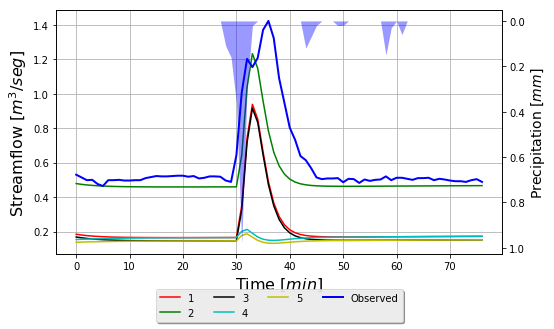

0.505536080573


In [234]:
wmf.plot_sim_single(Qsep, 
    mrain=S.values, 
    Qo=Qobs.values)#,
#     Dates = Rain[index-tm:index+tm].index.to_pydatetime())
print NS

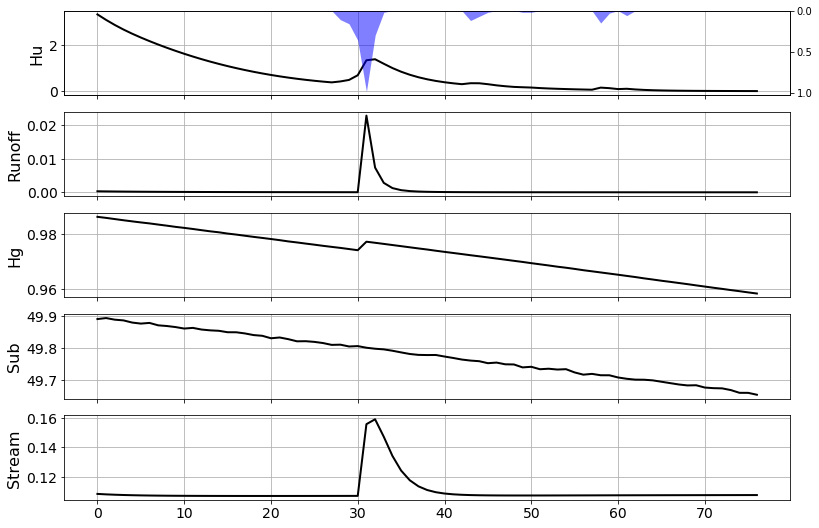

In [235]:
wmf.plot_mean_storage(Mean_Storage, mrain=S.values, lw = 2)

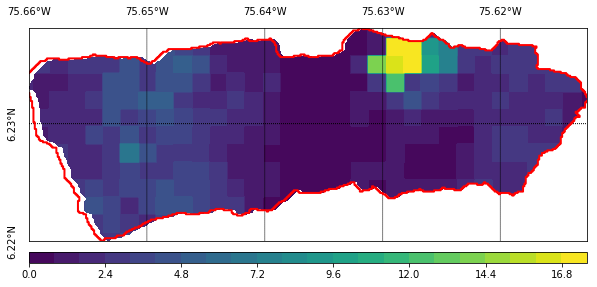

(<mpl_toolkits.basemap.Basemap at 0x7f936f6f7050>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f936f305e10>)

In [91]:
cu.Plot_basin(Res[0]['Rain_Acum'],lines_spaces=0.01)

Evp

In [122]:
corr=-50
inicio=Rain[str(index.year)].index.get_loc(index-tm)+corr
Calib = [0.000034, 28, 15, 0, 8, 6, 1, 0.89999, 3, 1]
# Calib = [0.000034, 28, 15, 0, 8, 6, 1, 0.89999, 2, 1]
Res = cu.run_shia(Calib, ruta_rain+year[str(index.year)]+'.bin', Npasos, inicio)#,kinematicN=7)

In [123]:
ini=20;end=Npasos;corr=30
Qsim=Res[0]['Qsim'][nodo][ini:end]
Qrun = Res[0]['Fluxes'][nodo][0][ini:end]
Qsub = Res[0]['Fluxes'][nodo][1][ini:end]
Qbase = Qsim - Qrun - Qsub
Qsim2=Qsim-Qsim.mean()+N.mean() #se cambia la magnitud del valor.
Qsep = np.vstack([Qsim,Qsim2, Qrun+Qbase, Qsub+Qbase, Qbase])
Qobs=N[Inicio+corr:Fin+corr][ini:end]
S=P[Inicio:Fin][ini:end]
NS=wmf.__eval_nash__(Qobs,Qsim2)
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])

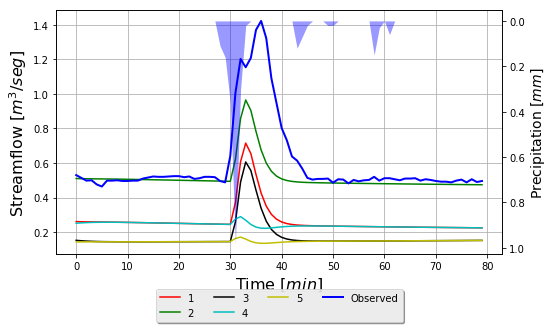

0.37288277084


In [124]:
wmf.plot_sim_single(Qsep, 
    mrain=S.values, 
    Qo=Qobs.values)#,
#     Dates = Rain[index-tm:index+tm].index.to_pydatetime())
print NS

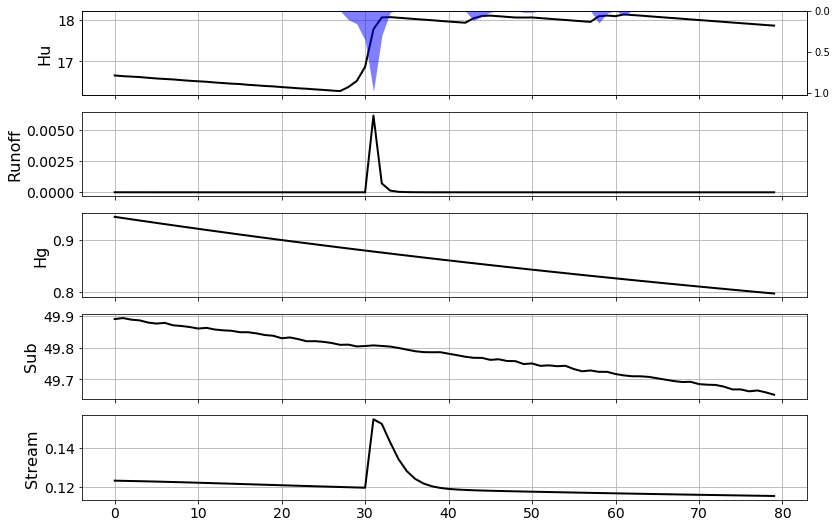

In [125]:
wmf.plot_mean_storage(Mean_Storage, mrain=S.values, lw = 2)

In [126]:
ini=-40
Mean_Storage=np.array([i[ini:] for i in Res[0]['Mean_Storage']])
Mean_Storage[0].max()-Mean_Storage[0][-1]

0.27230072

# ---

In [591]:
corr=-50
inicio=Rain[str(index.year)].index.get_loc(index)
# Calib = [0.000034, 28, 15, 0, 8, 6, 1, 0.89999, 3, 1]
# Calib = [0.0000034, 28, 15, 0, 8, 6, 1, 0.89999, 3, 1] # por más que le bajo el orden a Evp no sube.
Calib = [0.000034, 28, 15, 0, 8, 6, 1, 0.89999, 1.3, 1]
Res = cu.run_shia(Calib, ruta_rain+year[str(index.year)]+'.bin', Npasos, inicio)#,kinematicN=7)

AttributeError: 'str' object has no attribute 'year'

In [25]:
ini=20;end=Npasos;corr=31
Qsim=Res[0]['Qsim'][nodo][ini:end]
Qrun = Res[0]['Fluxes'][nodo][0][ini:end]
Qsub = Res[0]['Fluxes'][nodo][1][ini:end]
Qbase = Qsim - Qrun - Qsub
Qsim2=Qsim-Qsim.mean()+N.mean() #se cambia la magnitud del valor.
Qsep = np.vstack([Qsim,Qsim2, Qrun+Qbase, Qsub+Qbase, Qbase])
Qobs=N[Inicio+corr:Fin+corr][ini:end]
S=P[Inicio:Fin][ini:end]
NS=wmf.__eval_nash__(Qobs,Qsim2)
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])

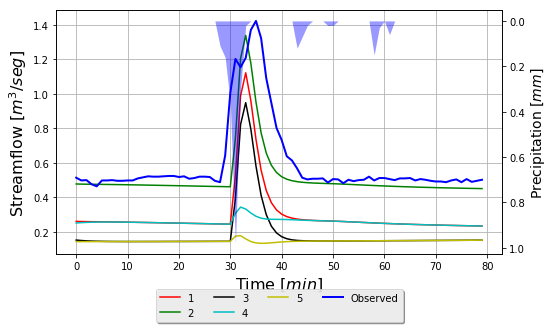

0.582192393624


In [26]:
wmf.plot_sim_single(Qsep, 
    mrain=S.values, 
    Qo=Qobs.values)#,
#     Dates = Rain[index-tm:index+tm].index.to_pydatetime())
print NS

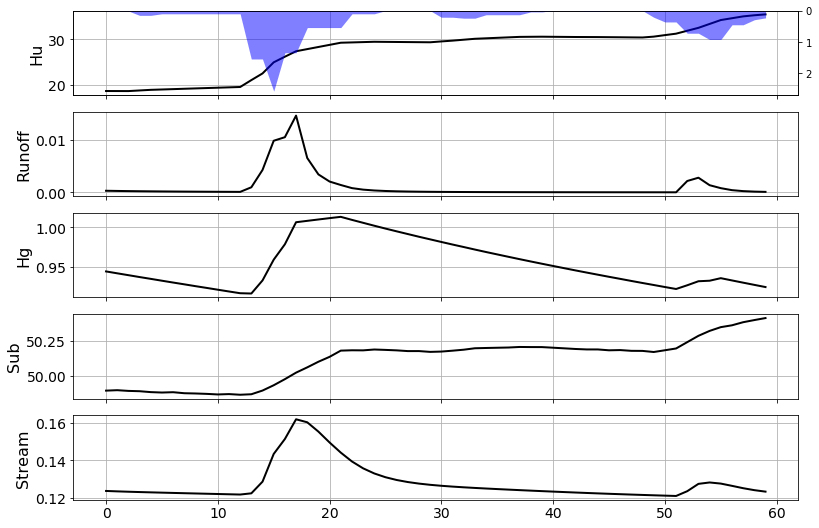

In [589]:
wmf.plot_mean_storage(Mean_Storage, mrain=S.values, lw = 2)

In [27]:
ini=-40
Mean_Storage=np.array([i[ini:] for i in Res[0]['Mean_Storage']])
Mean_Storage[0].max()-Mean_Storage[0][-1]

0.54008675

# ---

In [581]:
cu.set_Storage(wmf.models.max_capilar*0.8, 0)
cu.set_Storage(0.1, 1)
cu.set_Storage(1, 2)
cu.set_Storage(50,3)
cu.set_Storage(0.1, 4)


Ejecución 1

In [584]:
index

'2016-09-14-13:00'

In [583]:
corr=0
inicio=Rain[str(index.year)].index.get_loc(index)
Calib = [0.000034, 28, 15, 0, 8, 6, 1, 0.89999, 1.3, 1] # -- para picos.
Calib = [0.000034, 80, 15, 0, 1, 6, 1, 0.89999, 3, 1]
# Calib = [0.000034, 225, 40, 0, 0.008, 6, 1, 0.89999, 3, 1]
Res = cu.run_shia(Calib, ruta_rain+year[str(index.year)]+'.bin', Npasos, inicio)#,kinematicN=7)

AttributeError: 'str' object has no attribute 'year'

# ---

#### Evento 2

In [28]:
index=GsCut.index[1]

In [29]:
index

Timestamp('2016-09-15 00:00:00')

In [30]:
corr=0

In [31]:
Inicio = P.index.get_loc(index-tm)+corr
Npasos = 120
Fin = Inicio+Npasos#P.index.get_loc(index + tm)+corr
Npasos

120

120

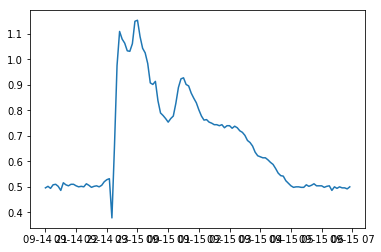

In [32]:
pl.plot(N[Inicio:Fin])
Npasos

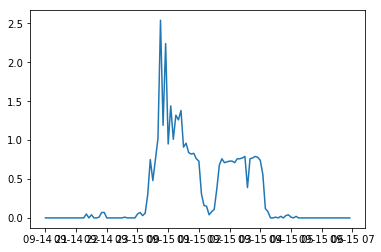

In [33]:
pl.plot(P[Inicio:Fin])

Set de condiciones iniciales:

In [34]:
cu.set_Storage(50,3)
cu.set_Storage(wmf.models.max_capilar*0.8, 0)
cu.set_Storage(1, 2)
cu.set_Storage(0.1, 4)
cu.set_Storage(0.1, 1)

Ejecución 1

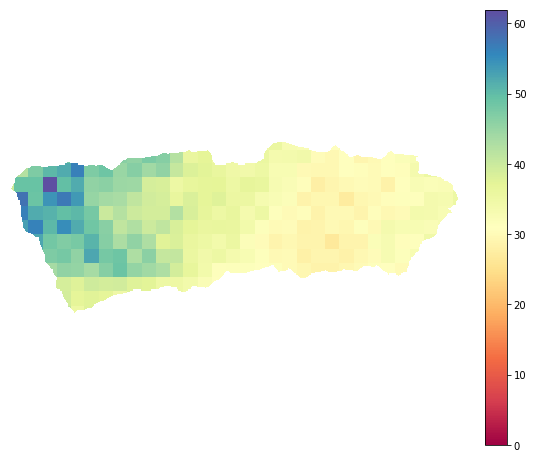

([-75.66084289550781,
  -75.613383493677247,
  6.223681449890137,
  6.2418729542769142],
 <matplotlib.axes._subplots.AxesSubplot at 0x7f64a14dbc10>)

In [74]:
cu.Plot_basinClean(Res[0]['Rain_Acum'],show_cbar=True)

#### Ks

In [443]:
corr=0
inicio=Rain[str(index.year)].index.get_loc(index-tm)+corr
Calib = [0.0014, 1, 4.0, 0, 1, 1, 1.0, 0.9, 1, 1]
Res = cu.run_shia(Calib, ruta_rain+year[str(index.year)]+'.bin', Npasos, inicio)#,kinematicN=7)

In [444]:
ini=20;end=Npasos;corr=-25
Qsim=Res[0]['Qsim'][nodo][ini:end]
Qrun = Res[0]['Fluxes'][nodo][0][ini:end]
Qsub = Res[0]['Fluxes'][nodo][1][ini:end]
Qbase = Qsim - Qrun - Qsub
Qsim2=Qsim-0.25+N.mean() #se cambia la magnitud del valor.
Qsep = np.vstack([Qsim,Qsim2, Qrun+Qbase, Qsub+Qbase, Qbase])
Qobs=N[Inicio+corr:Fin+corr][ini:end]
S=P[Inicio:Fin][ini:end]
NS=wmf.__eval_nash__(Qobs,Qsim2)
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])

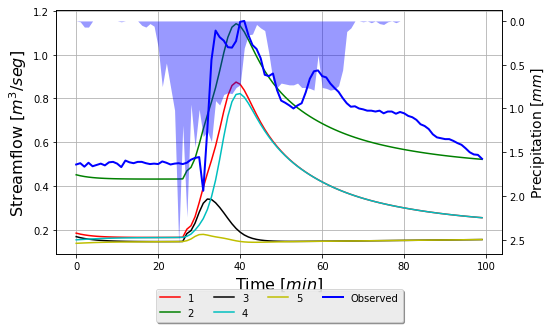

0.667245026704


In [445]:
wmf.plot_sim_single(Qsep, 
    mrain=S.values, 
    Qo=Qobs.values)#,
#     Dates = Rain[index-tm:index+tm].index.to_pydatetime())
print NS

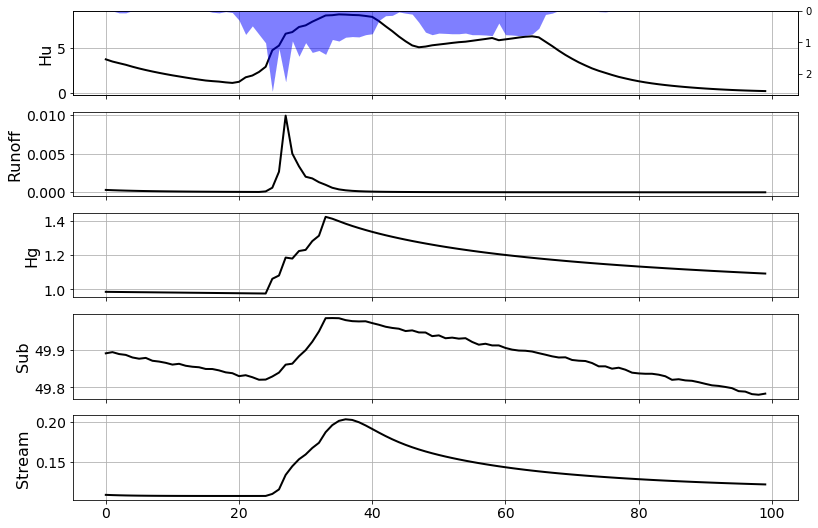

In [446]:
wmf.plot_mean_storage(Mean_Storage, mrain=S.values, lw = 2)

# --

#### All

In [25]:
corr=0
inicio=Rain[str(index.year)].index.get_loc(index-tm)+corr
# Calib = [0.000094, 30, 8, 0, 7, 6, 1.05, 0.999, 2.8, 1]
Calib = [0.000094, 30, 10, 0, 7, 6, 1, 0.999, 3, 1]
# Calib = [0.000064, 30, 10, 0, 7, 6, 1, 0.999, 3, 1]
Res = cu.run_shia(Calib, ruta_rain+year[str(index.year)]+'.bin', Npasos, inicio)#,kinematicN=7)

In [26]:
ini=20;end=Npasos;corr=-25
Qsim=Res[0]['Qsim'][nodo][ini:end]
Qrun = Res[0]['Fluxes'][nodo][0][ini:end]
Qsub = Res[0]['Fluxes'][nodo][1][ini:end]
Qbase = Qsim - Qrun - Qsub
Qsim2=Qsim-0.25+N.mean() #se cambia la magnitud del valor.
Qsep = np.vstack([Qsim,Qsim2, Qrun+Qbase, Qsub+Qbase, Qbase])
Qobs=N[Inicio+corr:Fin+corr][ini:end]
S=P[Inicio:Fin][ini:end]
NS=wmf.__eval_nash__(Qobs,Qsim2)
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])

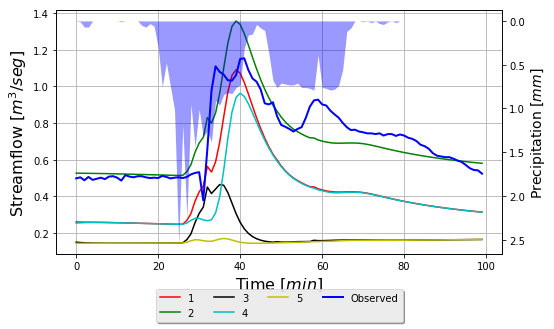

0.71809262022


In [27]:
wmf.plot_sim_single(Qsep, 
    mrain=S.values, 
    Qo=Qobs.values)#,
#     Dates = Rain[index-tm:index+tm].index.to_pydatetime())
print NS

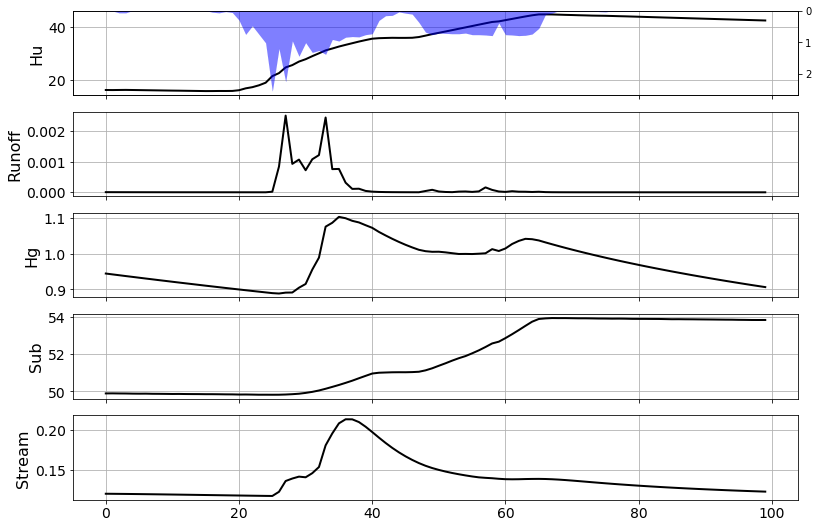

In [28]:
wmf.plot_mean_storage(Mean_Storage, mrain=S.values, lw = 2)

In [30]:
ini=80;end=Npasos
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])
Mean_Storage[0].max()-Mean_Storage[0][-1]

2.2967415

# --

#### All

In [37]:
corr=0
inicio=Rain[str(index.year)].index.get_loc(index-tm)+corr
# Calib = [0.000094, 30, 8, 0, 7, 6, 1.05, 0.999, 2.8, 1]
# Calib = [0.000094, 30, 10, 0, 7, 6, 1, 0.999, 3, 1]
Calib = [0.000034, 28, 15, 0, 8, 6, 1, 0.89999, 3, 1]
Res = cu.run_shia(Calib, ruta_rain+year[str(index.year)]+'.bin', Npasos, inicio)#,kinematicN=7)

In [38]:
ini=20;end=Npasos;corr=-25
Qsim=Res[0]['Qsim'][nodo][ini:end]
Qrun = Res[0]['Fluxes'][nodo][0][ini:end]
Qsub = Res[0]['Fluxes'][nodo][1][ini:end]
Qbase = Qsim - Qrun - Qsub
Qsim2=Qsim-0.25+N.mean() #se cambia la magnitud del valor.
Qsep = np.vstack([Qsim,Qsim2, Qrun+Qbase, Qsub+Qbase, Qbase])
Qobs=N[Inicio+corr:Fin+corr][ini:end]
S=P[Inicio:Fin][ini:end]
NS=wmf.__eval_nash__(Qobs,Qsim2)
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])

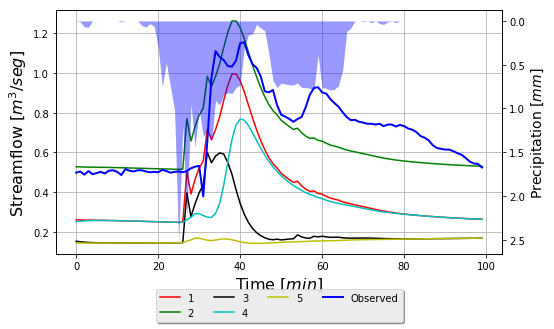

0.524992594968


In [107]:
wmf.plot_sim_single(Qsep, 
    mrain=S.values, 
    Qo=Qobs.values)#,
#     Dates = Rain[index-tm:index+tm].index.to_pydatetime())
print NS

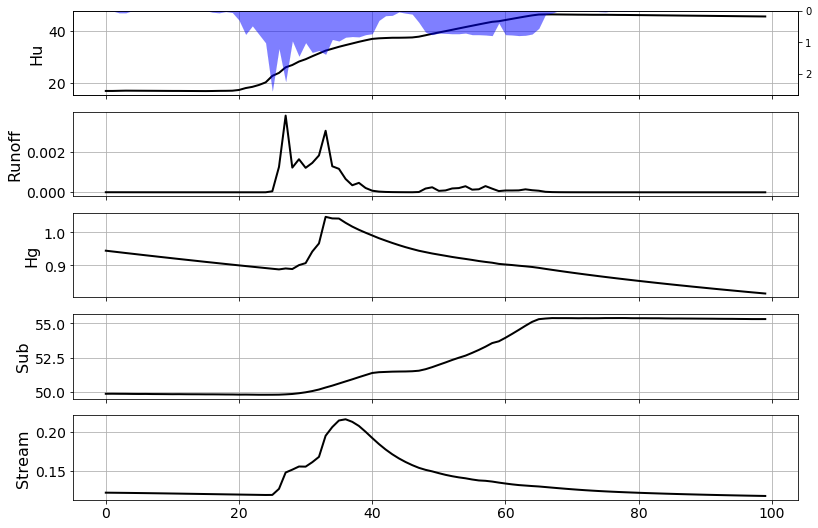

In [40]:
wmf.plot_mean_storage(Mean_Storage, mrain=S.values, lw = 2)

In [41]:
ini=80;end=Npasos
Mean_Storage=np.array([i[ini:end] for i in Res[0]['Mean_Storage']])
Mean_Storage[0].max()-Mean_Storage[0][-1]

0.80569458

# --